# Problem Statement

### You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


# Identifing the customers that are most likely to buy Insurance, so that they can be specifically targeted via call

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('CustomersData.csv')
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
data.shape

(45211, 11)

In [4]:
print(data.columns)

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')


## 1. Data types Checking and Removing Duplicates

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


**All the features are in right format. So no need to type cast any feature.**

In [6]:
data.duplicated().sum()

6

**There are 6 duplicates. Hence dropping all 6 duplicates from the dataset.**

In [7]:
data.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# Visualization 

In [8]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
cat_var = [col for col in data.columns if data[col].dtype == 'object' ]
num_var = [col for col in data.columns if data[col].dtype != 'object']

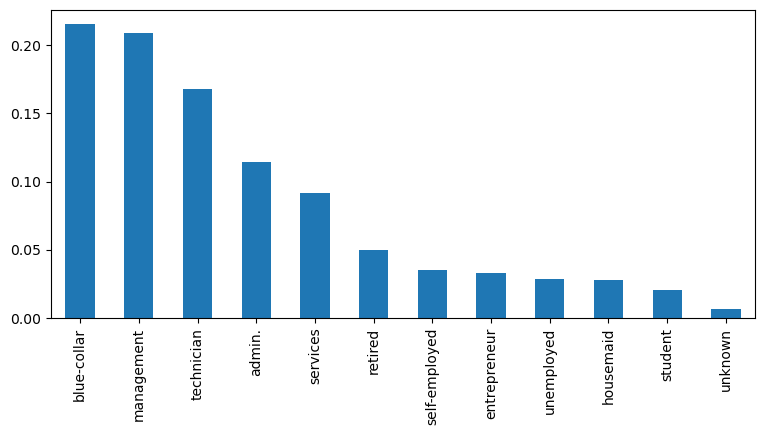

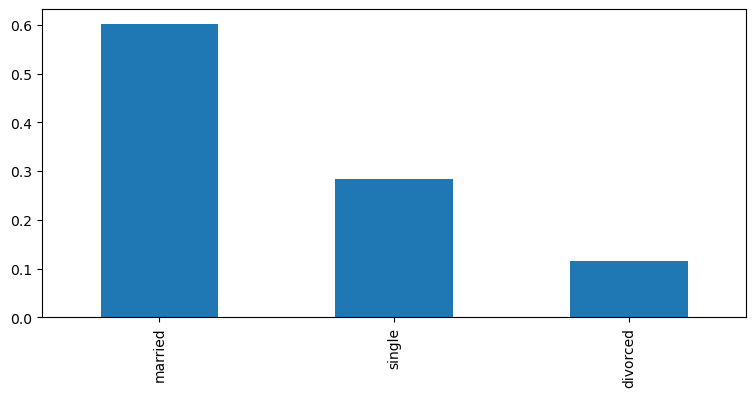

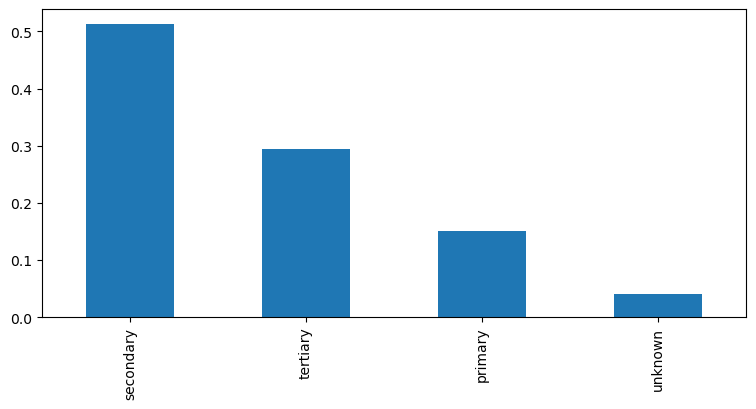

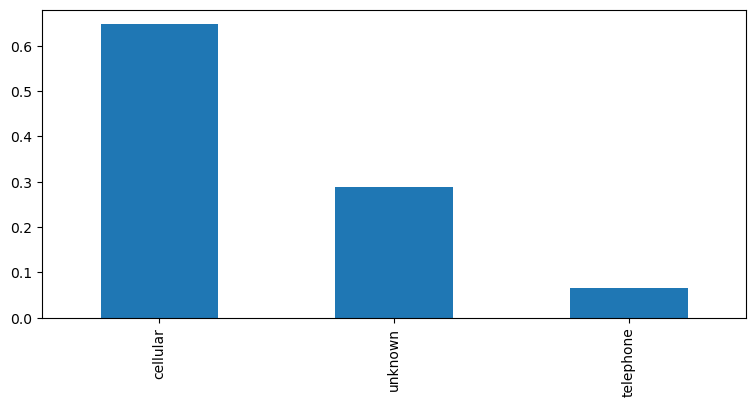

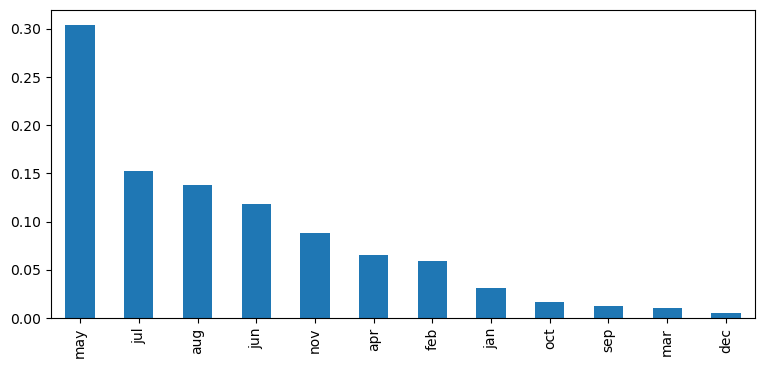

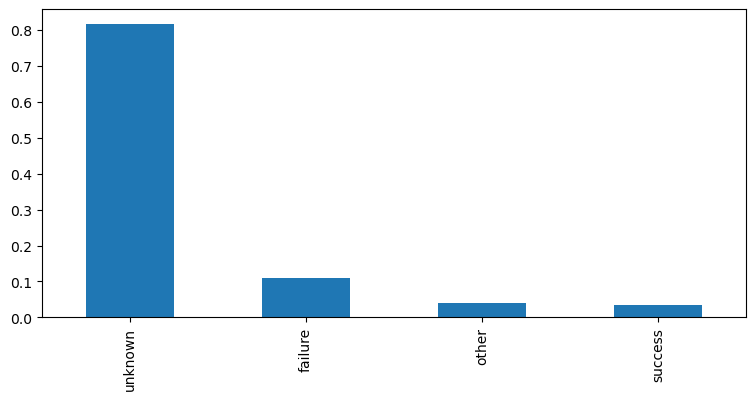

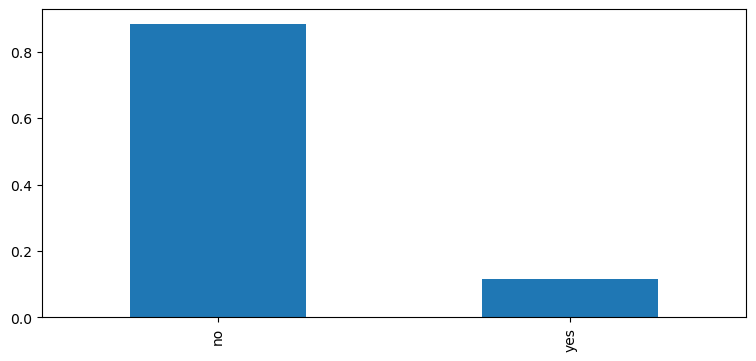

In [11]:
for col in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    data[col].value_counts(normalize=True).plot(kind="bar")

**Observations :**

**The top three professions of available customers are blue-collar,Management and technicians.**

**A huge number of the customers are married.**

**Cellular type is most used by customers.**

**Many customers have been contacted in the month of May.**

**Not many customers are converted previously**

**Most of customers are belong to secondary education qualification**

**As seen from the Target plot. The data/target is imbalance and not evenly distributed.**

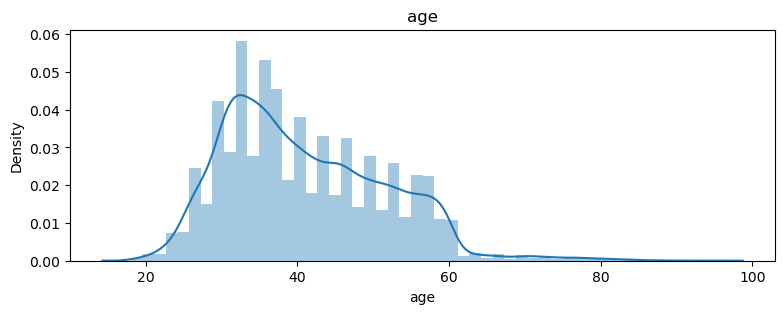

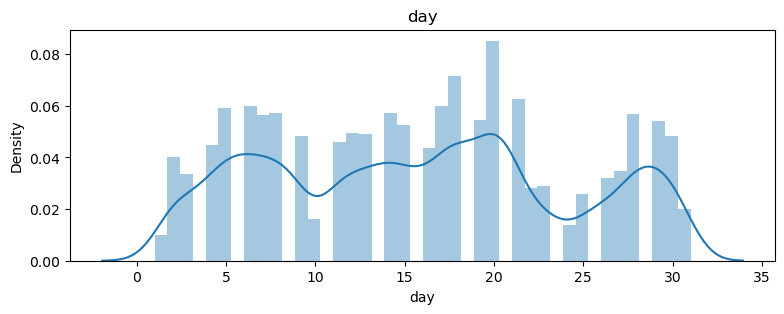

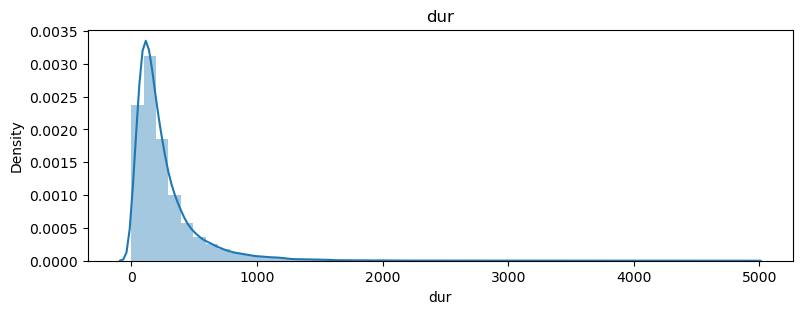

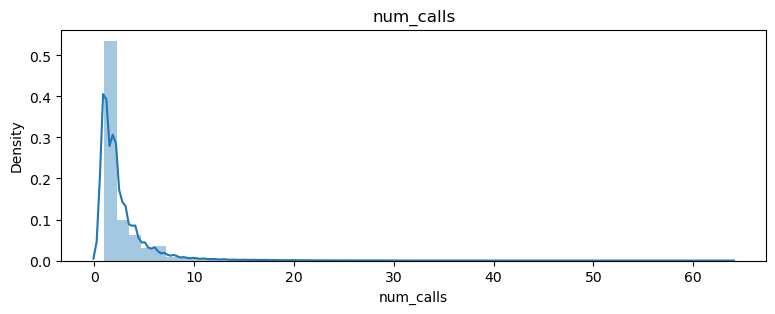

In [12]:
for col in num_var:
    plt.figure(figsize=(20,3))
    plt.subplot(121)
    sns.distplot(data[col], kde=True)
    plt.title(col)

**Observation from the Numerical features is that, both dur and num_calls are left skewed due to the presence of Outliers.**
**This needs to be cleaned during Data Cleaning Process**

## 3. Data Cleanining - Checking each column one by one and performing below operations. 

#### > Checking if any Null values.
#### > Checking if any unknown value in the features. 
#### > Checking if any Outliers. 

### Age

In [13]:
data.age.isnull().sum()

0

In [14]:
data.age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [15]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

**Min age is 18 and max age is 98. No outliers here. Also as seen above there are no null values too. This features is fine.**

### Job

In [16]:
data.job.isnull().sum()

0

**There are no null values.**

In [17]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [18]:
data.pivot_table(index=['job'],aggfunc='size')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

**There are 288 unknown job status. Replacing them to be treated as unemployed.**

In [19]:
data.job=data.job.replace({'unknown':'unemployed'})

In [20]:
data.pivot_table(index=['job'],aggfunc='size')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1591
dtype: int64

### Marital

In [21]:
data.marital.isnull().sum()

0

In [22]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

**No null values and also feature has only three valid Marital status**

### Education_qual

In [23]:
data.education_qual.isnull().sum()

0

In [24]:
data.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [25]:
data.pivot_table(index=['education_qual'],aggfunc='size')

education_qual
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

In [26]:
#Replacing unknown by mode of the education_qual i.e., secondary.

data.education_qual= data.education_qual.replace("unknown", 'secondary')
data.pivot_table(index=['education_qual'],aggfunc='size')

education_qual
primary       6851
secondary    25059
tertiary     13301
dtype: int64

### call_type

In [27]:
data.call_type.isnull().sum()

0

In [28]:
data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
data.pivot_table(index=['call_type'],aggfunc='size')

call_type
cellular     29285
telephone     2906
unknown      13020
dtype: int64

**No null values and also feature has only three valid call_type. Unknown is more 30% hence neither dropping it nor adjusting it**

### day

In [30]:
data.day.isnull().sum()

0

In [31]:
data.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

**No null values and also feature has ono outliers. Everything is valid dates**

### mon

In [32]:
data.mon.isnull().sum()

0

In [33]:
data.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

**No null values and also feature has ono outliers. Everything is valid months**

### dur

In [34]:
data.dur.head()

0    261
1    151
2     76
3     92
4    198
Name: dur, dtype: int64

In [35]:
data.dur.isnull().sum()

0

**No null values**

In [36]:
data.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [37]:
print(data.loc[data['dur']==0])
print('\n============================================================================================\n')
print("The number of rows with 0 mins call time:",(data['dur']==0).sum())

       age           job  marital education_qual call_type  day  mon  dur  \
6424    53    management  married        primary   unknown   27  may    0   
22937   35    technician  married      secondary  cellular   26  aug    0   
36425   31  entrepreneur  married      secondary  cellular   11  may    0   

       num_calls prev_outcome   y  
6424           4      unknown  no  
22937         15      unknown  no  
36425          2      unknown  no  


The number of rows with 0 mins call time: 3


**Dropping the records with Call duration as 0**

In [38]:
dropIndex=data[data['dur']==0].index
dropIndex

Int64Index([6424, 22937, 36425], dtype='int64')

In [39]:
data.drop(dropIndex,inplace=True)

In [40]:
print("The number of rows with 0 mins call time:",(data['dur']==0).sum())

The number of rows with 0 mins call time: 0


**As seen below there are loads of Outliers. Max is 4918**

In [41]:
data.dur.describe()

count    45208.000000
mean       258.180211
std        257.527769
min          1.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [42]:
# compute interquantile range to calculate the boundaries
IQR= data.dur.quantile(0.75) - data.dur.quantile(0.25)
lower_bound= data.dur.quantile(0.25) - (1.5*IQR)
upper_bound= data.dur.quantile(0.75) + (1.5*IQR)
    
print('dur\n=====================\nIQR:',IQR,'\nLower Limit:', lower_bound, "\nUpper Limit:",  upper_bound)

dur
IQR: 216.0 
Lower Limit: -221.0 
Upper Limit: 643.0


In [43]:
sum(data.dur > 643)

3235

**Replacing all the outliers above 643 to uppper limit of 643**

In [44]:
data.loc[data.dur > 643, 'dur'] = 643

In [45]:
sum(data.dur > 643)

0

In [46]:
data.dur.describe()

count    45208.000000
mean       234.954897
std        176.745434
min          1.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: dur, dtype: float64

### num_calls

In [47]:
data.num_calls.isnull().sum()

0

In [48]:
data.num_calls.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [49]:
data.num_calls.describe()

count    45208.000000
mean         2.763560
std          3.097582
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [50]:
# compute interquantile range to calculate the boundaries
IQR= data.num_calls.quantile(0.75) - data.num_calls.quantile(0.25)
lower_bound= data.num_calls.quantile(0.25) - (1.5*IQR)
upper_bound= data.num_calls.quantile(0.75) + (1.5*IQR)
    
print('num_calls\n=====================\nIQR:',IQR,'\nLower Limit:', lower_bound, "\nUpper Limit:",  upper_bound)

num_calls
IQR: 2.0 
Lower Limit: -2.0 
Upper Limit: 6.0


In [51]:
print('The number of rows with more than 6 calls: ', sum(data.num_calls > 6))

The number of rows with more than 6 calls:  3063


**Replacing all the outliers above 6 to uppper limit of 6**

In [52]:
data.loc[data.num_calls > 6,'num_calls'] = 6

In [53]:
print('The number of rows with more than 6 calls: ', sum(data.num_calls > 6))

The number of rows with more than 6 calls:  0


In [54]:
data.num_calls.describe()

count    45208.000000
mean         2.392121
std          1.600055
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

### prev_outcome

In [55]:
data.prev_outcome.isnull().sum()

0

In [56]:
data.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [57]:
data.pivot_table(index=['prev_outcome'],aggfunc='size')

prev_outcome
failure     4901
other       1840
success     1511
unknown    36956
dtype: int64

**No nulls values and feature has valid data. As unknows is almost 90%, I am neither replacing it not dropping it**

### y

In [58]:
data.y.isnull().sum()

0

In [59]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [60]:
data.pivot_table(index=['y'],aggfunc='size')

y
no     39919
yes     5289
dtype: int64

In [61]:
print('The successful Insurance holders from the given data is:', ((sum(data.y == 'yes')/(data.shape[0]))*100))

The successful Insurance holders from the given data is: 11.699256768713502


**No nulls values. But the Target 'y' has Imbalanced data. Just 11% are customer with 'y' . Rest 89% are customer with 'n'. Hence This data needs to be Resampled. I will be resampling it using SMOTE(Synthetic Minority Oversampling Technique) after encoding the categorical features.**

# 4.Encoding

**Encoding the categorical features.**

In [62]:
print(cat_var)

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']


In [63]:
## Encode labels in column 'job'
data.job = data.job.map({'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'services':4, 'technician':5, 'self-employed':6, 'admin.':7, 'management':8, 'unemployed':9, 'retired':10, 'student':11})
data.job.unique()

array([ 8,  5,  2,  1,  9, 10,  7,  4,  6,  3, 11], dtype=int64)

In [64]:
## Encode labels in column 'marital'
data.marital=data.marital.map({'single':0,'married':1,'divorced':2})
data.marital.unique()

array([1, 0, 2], dtype=int64)

In [65]:
## Encode labels in column 'education_qual'
data.education_qual=data.education_qual.map({'primary':1,'secondary':2,'tertiary':3})
data.education_qual.unique()

array([3, 2, 1], dtype=int64)

In [66]:
## Encode labels in column 'call_type'
data.call_type=data.call_type.map({'unknown':1,'telephone':2,'cellular':3})
data.call_type.unique()

array([1, 3, 2], dtype=int64)

In [67]:
## Encode labels in column 'mon'
data.mon=data.mon.map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
data.mon.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [68]:
## Encode labels in column 'prev_outcome'
data.prev_outcome=data.prev_outcome.map({'unknown':1,'failure':2,'other':3,'success':4})
data.prev_outcome.unique()

array([1, 2, 3, 4], dtype=int64)

In [69]:
## Encode labels in column 'y'
data.y=data.y.map({'no':0,'yes':1})
data.y.unique()

array([0, 1], dtype=int64)

In [70]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,3,1,5,5,261,1,1,0
1,44,5,0,2,1,5,5,151,1,1,0
2,33,2,1,2,1,5,5,76,1,1,0
3,47,1,1,2,1,5,5,92,1,1,0
4,33,9,0,2,1,5,5,198,1,1,0


<AxesSubplot:>

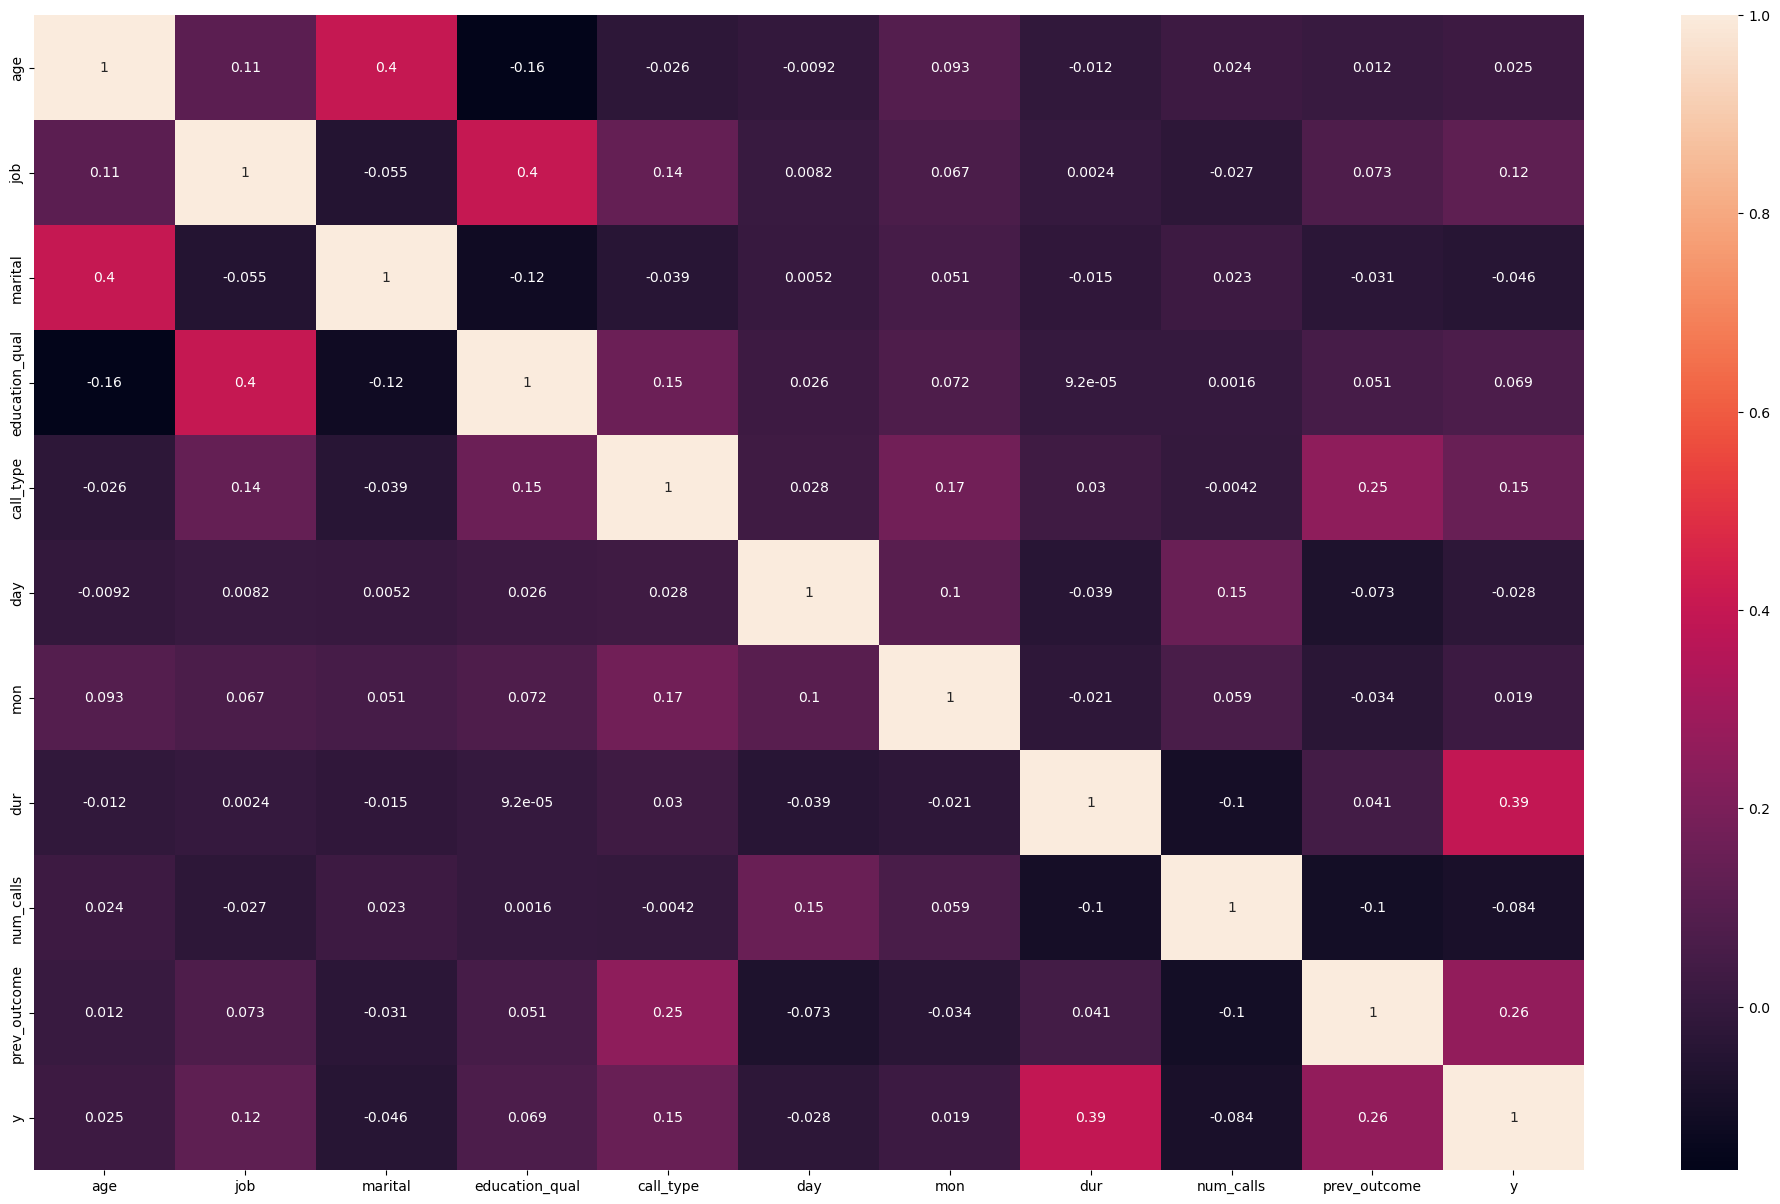

In [71]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True)

### Machine Learning Models before Oversampling the Imbalance data

In [72]:
from sklearn.model_selection import train_test_split

X= data.drop(['y'],axis=1)
y= data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

y_pred_model_logistic = model_logistic.predict(X_test)
y_prob_model_logistic = model_logistic.predict_proba(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_model_logistic)*100
print ("The accuracy of Logistic Regression is      : ",accuracy_logistic , "%")

auroc_logistic = roc_auc_score(y_test, y_prob_model_logistic[:, 1])
print ("The AUR ROC score of Logistic Regression is : ", auroc_logistic, '%')

The accuracy of Logistic Regression is      :  88.82990488829905 %
The AUR ROC score of Logistic Regression is :  0.8362507906682295 %


### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model_rf.fit(X_train, y_train)  

y_pred_model_rf = model_rf.predict(X_test)
y_prob_model_rf = model_rf.predict_proba(X_test)

accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)*100
print("The accuracy of Random Forest is           : ", accuracy_model_rf, "%")

auroc_model_rf = roc_auc_score(y_test, y_prob_model_rf[:,1])
print ("The AUR ROC score of  random forest is     : ", auroc_model_rf,'%')

The accuracy of Random Forest is           :  90.08331490083314 %
The AUR ROC score of  random forest is     :  0.9197798237931788 %


### XGBoost

In [75]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred_model_xgb = model_xgb.predict(X_test)
y_prob_model_xgb = model_xgb.predict_proba(X_test)

accuracy_model_xgb = accuracy_score(y_test,y_pred_model_xgb)*100
print("The accuracy of XGBoost is           : ", accuracy_model_xgb, "%")

auroc_model_xgb = roc_auc_score(y_test,y_prob_model_xgb[:,1])
print ("The AUR ROC score of  XGboost is     : ", auroc_model_xgb,'%')

The accuracy of XGBoost is           :  90.41509990415099 %
The AUR ROC score of  XGboost is     :  0.924343021752073 %


**As seen the AUR ROC of Logistic Regression, Random Forest and XGBoost everything is very less. This is due to Imbalance data. I will be using the SMOTE technique to Oversample the data to make it evenly distributed.**

### SMOTE Oversampling we are using because to imbalance data.

**Separating independent and dependent variables**

In [76]:
p= data.drop(['y'],axis=1)
q= data['y']

In [77]:
from imblearn.combine import SMOTETomek

# Define the SMOTETomek object with a 0.75 sampling strategy
smote_tomek = SMOTETomek(sampling_strategy=0.75)

# Apply SMOTETomek oversampling to the training data
X, y = smote_tomek.fit_resample(p, q)

# Check the class distribution of the resampled data
print(y.value_counts())
print('**********************************************************************************')
print(X.head())

0    39531
1    29551
Name: y, dtype: int64
**********************************************************************************
   age  job  marital  education_qual  call_type  day  mon  dur  num_calls  \
0   58    8        1               3          1    5    5  261          1   
1   44    5        0               2          1    5    5  151          1   
2   33    2        1               2          1    5    5   76          1   
3   47    1        1               2          1    5    5   92          1   
4   33    9        0               2          1    5    5  198          1   

   prev_outcome  
0             1  
1             1  
2             1  
3             1  
4             1  


**Splitting resampled data in train and test data**

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Scaling the data using StandardScaler**

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Machine Learning Models after SMOTE

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

y_pred_model_lr = model_logistic.predict(X_test)
y_prob_model_lr = model_logistic.predict_proba(X_test)

accuracy_model_lr = accuracy_score(y_test, y_pred_model_lr)*100
print ("The accuracy of Logistic Regression is      : ",accuracy_model_lr , "%")

auroc_model_lr = roc_auc_score(y_test, y_prob_model_lr[:, 1])
print ("The AUR ROC score of Logistic Regression is : ", auroc_model_lr, '%')

The accuracy of Logistic Regression is      :  79.64776839565741 %
The AUR ROC score of Logistic Regression is :  0.8793740065657627 %


### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model_rf.fit(X_train, y_train)  

y_pred_model_rf = model_rf.predict(X_test)
y_prob_model_rf = model_rf.predict_proba(X_test)

accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)*100
print("The accuracy of Random Forest is           : ", accuracy_model_rf, "%")

auroc_model_rf = roc_auc_score(y_test, y_prob_model_rf[:,1])
print ("The AUR ROC score of  random forest is     : ", auroc_model_rf,'%')

The accuracy of Random Forest is           :  91.4692400482509 %
The AUR ROC score of  random forest is     :  0.9737658324168146 %


### XGBoost

In [82]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred_model_xgb = model_xgb.predict(X_test)
y_prob_model_xgb = model_xgb.predict_proba(X_test)

accuracy_model_xgb = accuracy_score(y_test,y_pred_model_xgb)*100
print("The accuracy of XGBoost is           : ", accuracy_model_xgb, "%")

auroc_model_xgb = roc_auc_score(y_test,y_prob_model_xgb[:,1])
print ("The AUR ROC score of  XGboost is     : ", auroc_model_xgb,'%')

The accuracy of XGBoost is           :  90.04583835946924 %
The AUR ROC score of  XGboost is     :  0.9608174301114746 %


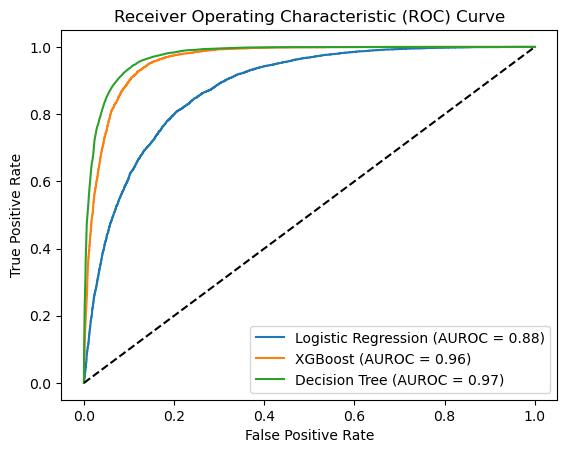

In [83]:
from sklearn.metrics import roc_curve

lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob_model_lr[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_prob_model_rf[:,1])
xg_fpr, xg_tpr, _ = roc_curve(y_test, y_prob_model_xgb[:,1])

# Plot ROC curves
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUROC = {auroc_model_lr:.2f})')
plt.plot(xg_fpr, xg_tpr, label=f'XGBoost (AUROC = {auroc_model_xgb:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Decision Tree (AUROC = {auroc_model_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**As seen now,  the AUR ROC of Logistic Regression, Random Forest and XGBoost everything has improved drastically. Also, it can be seen clearly that, based on the Historical data, Decision Tree with AUR ROC of 0.97 is best suited for this Model. We can implement Decision Tree to predict the customer who is most likely to purchase the Insurance.**



### Finding the feature importance for features using Random Forest Model

In [84]:
# Random forest for feature importance on a classification problem
feature_names = list(data.columns)
if 'y' in feature_names:
    feature_names.remove('y')
    
# get importance
importance = model_rf.feature_importances_

# feature importance
imp=[]
for i,v in enumerate(importance):
    imp.append(v)

# Printing the feature and it's importance score
for i in range (0,len(importance)):
    print(f'Feature: {feature_names[i]}, Score: {imp[i]}')

Feature: age, Score: 0.11022690871229186
Feature: job, Score: 0.06328982315547538
Feature: marital, Score: 0.036226353247860714
Feature: education_qual, Score: 0.0221072117769343
Feature: call_type, Score: 0.06017276721799875
Feature: day, Score: 0.11125408243965121
Feature: mon, Score: 0.10857145288332339
Feature: dur, Score: 0.38127285321340393
Feature: num_calls, Score: 0.051156696191738495
Feature: prev_outcome, Score: 0.05572185116132212


**As seen above, feature 'dur' is most important with 0.38. So spending more call time with customer is more likely to turn into Successfull Insurance customer. Apart from 'dur' feature, even the features like 'day' of the call, 'age' of the customer, 'mon' of the call are also next importance features.**